In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

**Подготовка данных**

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)


(60000, 28, 28)
(60000, 784)


In [ ]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [ ]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

**Создание**

In [ ]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


**Обучение**

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 8s 16ms/step - loss: 0.2069 - accuracy: 0.9381
Epoch 2/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0753 - accuracy: 0.9766
Epoch 3/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0488 - accuracy: 0.9846
Epoch 4/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0328 - accuracy: 0.9894
Epoch 5/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0243 - accuracy: 0.9918
Epoch 6/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0207 - accuracy: 0.9932
Epoch 7/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0182 - accuracy: 0.9940
Epoch 8/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 9/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0154 - accuracy: 0.9949
Epoch 10/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0124 - accura

**Работа со своим изображением**



In [ ]:
from google.colab import files #загружаем файл
uploaded = files.upload()

Saving pro5_2.jpg to pro5_2 (1).jpg


In [ ]:
im = Image.open('pro5_2.jpg').convert('L') # открываем и далее переводим в numpy массив
im1 = np.array(im, dtype=np.float32)

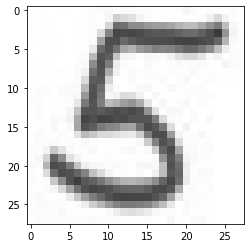

In [ ]:
plt.imshow(Image.fromarray(im1).convert('RGBA'))  #отрисовываем картинку
plt.show()

In [ ]:
print(im1.shape)

(28, 28)


In [ ]:
im1 = im1.reshape(784) #меняем размер
im1 = im1/255 #нормализуем
x = np.expand_dims(im1, axis=0) #меняем размерность

In [ ]:
print(x.shape) #проверяем размер

(1, 784)


In [ ]:
prediction = model.predict(x) #Распознаём

In [ ]:
pred = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(pred)

5
